In [4]:
pip install numpy==2.0.0 pandas matplotlib seaborn requests ta plotly scikit-learn tensorflow==2.18.0 statsmodels 


Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd 
import requests 
import ta
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.tsa.stattools as stattools
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss 
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels
import datetime

2024-12-03 18:19:00.624257: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-03 18:19:00.626145: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-03 18:19:00.630703: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-03 18:19:00.643713: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733249940.666862  126249 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733249940.67

In [6]:
pip uninstall python-binance -y

Found existing installation: python-binance 1.0.24
Uninstalling python-binance-1.0.24:
  Successfully uninstalled python-binance-1.0.24
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install python-binance

  Using cached python_binance-1.0.24-py2.py3-none-any.whl.metadata (13 kB)
Using cached python_binance-1.0.24-py2.py3-none-any.whl (95 kB)
Note: you may need to restart the kernel to use updated packages.


In [8]:
from binance.client import Client
import pandas as pd
import time

# Initialisation du client Binance
client = Client()

# Paramètres de l'extraction
symbol = 'BTCUSDT'
interval = Client.KLINE_INTERVAL_1DAY
start_date = '1 Jan, 2023'
end_date = '31 Dec, 2023'

# Fonction pour extraire des données historiques de Binance
def get_historical_data(symbol, interval, start_date, end_date):
    # Convertir les dates en timestamps
    start_ts = int(pd.Timestamp(start_date).timestamp() * 1000)
    end_ts = int(pd.Timestamp(end_date).timestamp() * 1000)
    klines = []

    # Télécharger les données par lots (max 1000 chandeliers par requête)
    while start_ts < end_ts:
        temp_klines = client.get_klines(
            symbol=symbol,
            interval=interval,
            limit=1000,
            startTime=start_ts
        )
        if not temp_klines:
            break
        klines.extend(temp_klines)
        start_ts = temp_klines[-1][0] + 1  # Passer au prochain lot
        time.sleep(0.1)  # Respecter les limites de l'API

    # Transformer les données en DataFrame
    df = pd.DataFrame(klines, columns=[
        'timestamp', 'open', 'high', 'low', 'close', 'volume',
        'close_time', 'quote_asset_volume', 'number_of_trades',
        'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore'
    ])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')  # Convertir en format lisible
    df[['open', 'high', 'low', 'close', 'volume']] = df[['open', 'high', 'low', 'close', 'volume']].astype(float)
    return df

# Extraire les données
df = get_historical_data(symbol, interval, start_date, end_date)

# Sauvegarder les données dans un fichier CSV
output_file = "BTCUSDT_daily_2023.csv"
df.to_csv(output_file, index=False)
print(f"Données sauvegardées dans {output_file}")

Données sauvegardées dans BTCUSDT_daily_2023.csv


In [9]:
# Charger les données depuis le fichier CSV
data_file = "BTCUSDT_daily_2023.csv"
df = pd.read_csv(data_file)

# Convertir la colonne 'timestamp' en format datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Vérifier les données
print(df.head())
print(df.info())

   timestamp      open      high       low     close        volume  \
0 2023-01-01  16541.77  16628.00  16499.01  16616.75   96925.41374   
1 2023-01-02  16617.17  16799.23  16548.70  16672.87  121888.57191   
2 2023-01-03  16672.78  16778.40  16605.28  16675.18  159541.53733   
3 2023-01-04  16675.65  16991.87  16652.66  16850.36  220362.18862   
4 2023-01-05  16850.36  16879.82  16753.00  16831.85  163473.56641   

      close_time  quote_asset_volume  number_of_trades  \
0  1672617599999        1.604794e+09           3218355   
1  1672703999999        2.034683e+09           4036118   
2  1672790399999        2.662766e+09           5097596   
3  1672876799999        3.709833e+09           6310703   
4  1672963199999        2.751080e+09           4842014   

   taker_buy_base_asset_volume  taker_buy_quote_asset_volume  ignore  
0                  48548.78168                  8.038417e+08       0  
1                  60925.25948                  1.017075e+09       0  
2                

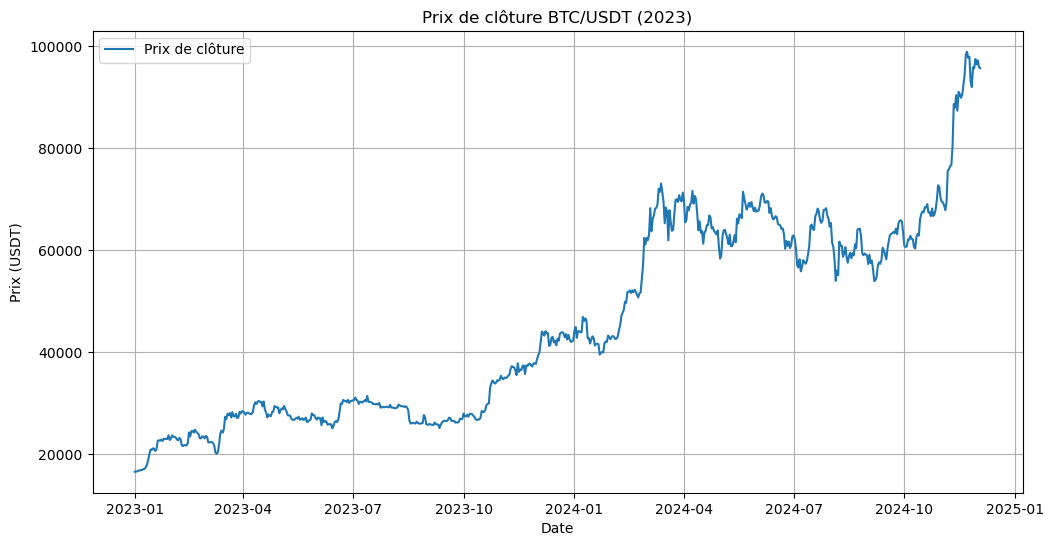

In [10]:
# Graphique simple des prix de clôture
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['close'], label='Prix de clôture')
plt.title("Prix de clôture BTC/USDT (2023)")
plt.xlabel("Date")
plt.ylabel("Prix (USDT)")
plt.legend()
plt.grid()
plt.show()

In [11]:
# Checking for any missing (NaN) values in the dataset.
df.isna().sum()

timestamp                       0
open                            0
high                            0
low                             0
close                           0
volume                          0
close_time                      0
quote_asset_volume              0
number_of_trades                0
taker_buy_base_asset_volume     0
taker_buy_quote_asset_volume    0
ignore                          0
dtype: int64

In [12]:
def visualize_data(data, symbol, interval):
    """

    Aim : Visualize the close cotation of  the considered Cryptocurrencie on the considered interval
    
    Input : 
    - data :
        type: pandas DataFrame 
                
    - symbol :
        type: string
        for instance 'BTC/USD'
        
    - interval : 
        type: string
        for instance '1day' or '5min'
        
    Output : Plot

    """
 
    sns.set(style = 'darkgrid')
    plt.title('Close cotation of '+ str(symbol))
    plt.xlabel(str(interval))
    plt.ylabel('USD')
    sns.lineplot(x = data.index, y = data['close'], color = 'green')
       
    plt.show()

In [13]:
def finance_visualize(data, symbol, interval):

    """

    Aim : Visualize the candle of the market of the considered Cryptocurrencie
    on the considered interval
    
    Input : 
    - data :
        type: pandas DataFrame 
                
    - symbol :
        type: string
        for instance 'BTC/USD'
        
    - interval : 
        type: string
        for instance '1day' or '5min'
        
    Output : Plot
    
    """

    # Creating a candlestick chart using Plotly.
    fig = go.Figure(data=[go.Candlestick(x=data['timestamp'],
                                     open=data['open'],
                                     high=data['high'],
                                     low=data['low'],
                                     close=data['close'])])
    
    fig.update_layout(title='Cotation of ' + str(symbol) + ' per ' + str(interval) ,
                  xaxis_title='Date',
                  yaxis_title='Price in USD',
                  xaxis_rangeslider_visible=False)



    fig.show()

In [14]:
def visualize_with_indicator(data, symbol, interval, indicator):

    """

    Aim : Visualize the candle of the market of the considered Cryptocurrencie
    on the considered interval
    
    Input : 
    - data :
        type: pandas DataFrame 
                
    - symbol :
        type: string
        for instance 'BTC/USD'
        
    - interval : 
        type: string
        for instance '1day' or '5min'
    - indicator :
        type: string
        RSI EMA ATR
        
    Output : Plot
    


    """
 
    
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=['Candles', str(indicator)])
    candle = go.Candlestick(x=data['timestamp'],
                                        open=data['open'],
                                        high=data['high'],
                                        low=data['low'],
                                        close=data['close'])

    fig.add_trace(candle, row=1, col =1)


    rsi_trace=go.Scatter(x=data['timestamp'], y=data[str(indicator)], mode='lines', name=str(indicator), yaxis='y2')

    fig.add_trace(rsi_trace, row=2, col=1)

    
    fig.update_layout(title='Cotation of ' + str(symbol) + ' per ' + str(interval) ,
                  xaxis_title='Date',
                  yaxis_title='Price in USD',
                  xaxis_rangeslider_visible=False)



    fig.show()


In [15]:
def add_indicators(data, period=14):

    """
    input :
    data : type pandas DataFrame 

    output : a pandas DataFrame wich contain the three indicators 
    
    """
    
    ema = ta.trend.ema_indicator(close = data['close'], window = period).dropna()
    rsi = ta.momentum.rsi(close=data['close'], window=period).dropna()
    atr = ta.volatility.AverageTrueRange(close=data['close'],high=data['high'], low=data['low'], window=period).average_true_range()
    atr = atr[atr>0]
    data = pd.DataFrame(data.loc[period-1:])


    data['RSI'] = rsi
    data['EMA'] = ema
    data['ATR'] = atr



    return data.reset_index().drop('index', axis=1)


In [16]:
def scaling_data(data):

    """

    aim : Scale the data frma with MinMax scaler to apply machine learning models 

    input : 
    data : type pandas DataFrame

    output : scaled DataFrame

    """



    
    # Create a copy of the data to avoid modifying the original DataFrame
    scaled_data = data.copy()

    # Find the global minimum and maximum values from the 'low' and 'high' columns, respectively
    global_min = data['low'].min()
    global_max = data['high'].max()

    # Define a function to scale each value
    def scale_value(value, min_val, max_val):
        return (value - min_val) / (max_val - min_val)

    # Scale the 'open' and 'close' prices with respect to the global min and max
    scaled_data['open'] = data['open'].apply(scale_value, args=(global_min, global_max))
    scaled_data['close'] = data['close'].apply(scale_value, args=(global_min, global_max))

    # we directly scale 'high' and 'low' with global min and max as well
    scaled_data['high'] = data['high'].apply(scale_value, args=(global_min, global_max))
    scaled_data['low'] = data['low'].apply(scale_value, args=(global_min, global_max))

    # Scale other columns individually 
    for column in data.columns:
        if column not in ['timestamp', 'open', 'high', 'low', 'close']:
            
            scaler = MinMaxScaler(feature_range=(0, 1))
            # Scale each column separately
            scaled_column = scaler.fit_transform(data[[column]])
            # Store the scaled values back in the DataFrame
            scaled_data[column] = scaled_column.flatten()

    return scaled_data

In [17]:
final_data = add_indicators(df)
final_data

,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,RSI,EMA,ATR
0,2023-01-14,19930.01,21258.00,19888.05,20954.92,393913.74951,1673740799999,8.183072e+09,8659545,197817.55209,4.109568e+09,0,99.633998,18092.438235,495.185000
1,2023-01-15,20952.76,21050.74,20551.01,20871.50,178542.22549,1673827199999,3.710527e+09,5194354,88310.83908,1.835437e+09,0,97.301269,18462.979804,495.509643
2,2023-01-16,20872.99,21474.05,20611.48,21185.65,293078.08262,1673913599999,6.168654e+09,6856434,145352.66942,3.059597e+09,0,97.535299,18826.002497,521.728240
3,2023-01-17,21185.65,21647.45,20841.31,21134.81,275407.74409,1673999999999,5.840586e+09,6440138,137121.64311,2.908227e+09,0,96.083143,19133.843497,542.043366
4,2023-01-18,21132.29,21650.00,20407.15,20677.47,350916.01949,1674086399999,7.399719e+09,7617173,173174.41690,3.652038e+09,0,83.971533,19339.660364,592.100982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,2024-11-29,95643.99,98619.99,95364.99,97460.00,27701.78231,1732924799999,2.690451e+09,5094070,13840.21172,1.344149e+09,0,68.647934,93455.656116,3559.388177
686,2024-11-30,97460.00,97463.95,96092.01,96407.99,14503.83306,1733011199999,1.402673e+09,3354759,7075.91503,6.842848e+08,0,65.796678,93849.300634,3403.141878
687,2024-12-01,96407.99,97836.00,95693.88,97185.18,16938.60452,1733097599999,1.641328e+09,3342200,8114.89569,7.864890e+08,0,66.890760,94294.084549,3313.068887
688,2024-12-02,97185.17,98130.00,94395.00,95840.62,37958.66981,1733183999999,3.646640e+09,7560103,18821.93327,1.808459e+09,0,63.128532,94500.289276,3343.206824


In [18]:
scaled_data = scaling_data(final_data)
scaled_data

,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,RSI,EMA,ATR
0,2023-01-14,0.004759,0.021351,0.004235,0.017564,0.558635,0.000000,0.460788,0.559836,0.557758,0.460694,0.0,1.000000,0.000000,0.000000
1,2023-01-15,0.017537,0.018761,0.012518,0.016522,0.247428,0.001451,0.200974,0.327472,0.243128,0.198314,0.0,0.971200,0.004840,0.000091
2,2023-01-16,0.016541,0.024050,0.013273,0.020447,0.412930,0.002903,0.343769,0.438926,0.407018,0.339553,0.0,0.974090,0.009581,0.007468
3,2023-01-17,0.020447,0.026217,0.016145,0.019812,0.387397,0.004354,0.324711,0.411010,0.383369,0.322088,0.0,0.956161,0.013602,0.013184
4,2023-01-18,0.019780,0.026249,0.010721,0.014098,0.496505,0.005806,0.415282,0.489938,0.486955,0.407906,0.0,0.806633,0.016290,0.027267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,2024-11-29,0.950724,0.987906,0.947238,0.973413,0.029467,0.994194,0.141717,0.320747,0.029162,0.141631,0.0,0.617449,0.984332,0.862117
686,2024-11-30,0.973413,0.973462,0.956321,0.960269,0.010396,0.995646,0.066909,0.204115,0.009727,0.065499,0.0,0.582247,0.989474,0.818157
687,2024-12-01,0.960269,0.978111,0.951347,0.969979,0.013915,0.997097,0.080773,0.203272,0.012712,0.077291,0.0,0.595755,0.995283,0.792815
688,2024-12-02,0.969979,0.981784,0.935119,0.953180,0.044288,0.998549,0.197263,0.486111,0.043475,0.195202,0.0,0.549307,0.997976,0.801295


In [19]:
def data_preprocess(scaled_data,regressor, prediction_time):

    """  
    Aim : Shift the data to do regression on time series 
    for example, if you want to predict the next 30 days by changing the data, 
    each line of price is associated with the value taken 30 days later.

    Input:
    - scaled_data   type : DataFrame
    - prediction_time   type : int

    Output:w
    - price Type : Numpy Array 
    - target Type : Numpy Array
    
    """
   
    target = scaled_data['close'].shift(-prediction_time).dropna()
    target = np.array(target).reshape(-1, 1)

    price = np.array(scaled_data[regressor])[:-prediction_time]
    
    return price, target 

In [20]:
def visualize_model(prediction_matrix,scaled_data, zoom = None):

    plt.xlabel('Days')
    plt.ylabel('BTC/USD ($)(scaled data)')
    plt.plot(scaled_data['close'])
    plt.plot(prediction_matrix[['close', 'prediction']])
    plt.legend(['Real Price', 'Real, price', 'Prediction'])
    if zoom is not None : 
        plt.xlim(zoom[0], zoom[1])
    plt.title('Prediction of close price of BTC/USD for the Last Month by Linear Regression')
    plt.show

In [21]:
def apply_linear_regression(scaled_data, prediction_time, price, target, regressor):

    """

    Input : 
    scaled_data : type pandas DataFrame wich contains the scaled data 
    prediction_time : type int, if prediction_time = 5 we predict the 5th next value 
    price : type numpy array
    target : numpy array 
    regressor : type list of strings 

    output : 
    prediction_matrix : type pandas DataFrame wich containts the realised price ans the predictions 
    future : type numpy array which contains the prediction_time future parice form the last date of the data set 
    r2 : type float it's the well known R2 of the linear regression

    """



    price_train, price_test, target_train, target_test = train_test_split(price, target, test_size = 0.3) # we split the data into test and training sets
    lr = LinearRegression().fit(price_train, target_train) # we fit the model on the training set 

    price_to_predict = price[-prediction_time:] # we take the last slice to predict 
    lr_prediction = lr.predict(price_to_predict) # we apply the model 


    prediction_matrix = pd.DataFrame(scaled_data['close'].tail(prediction_time)) # creat a DataFrame which contains the realised prices 
    prediction_matrix['prediction'] = lr_prediction # we add the prediction as a new column in order to compare with a plot 

    price_to_future = np.array(scaled_data[regressor])[-prediction_time:] # we take the last slice of our data to predict future values 
    future = lr.predict(price_to_future)

    target_predict = lr.predict(price_test)
    r2 = r2_score(target_test, target_predict) # we compute the R2

    return prediction_matrix, future, r2 


In [22]:
# Setting up parameters for a prediction model. Here, the goal is to predict the closing price 60 days in the future using the closing price as the regressor.
prediction_time = 60 # We want to predict the close price 60 days Later 
regressor = ['close'] # We choose One regressor which is the colse price itself
price, target  = data_preprocess(scaled_data, regressor, prediction_time) # Data Processing for the model

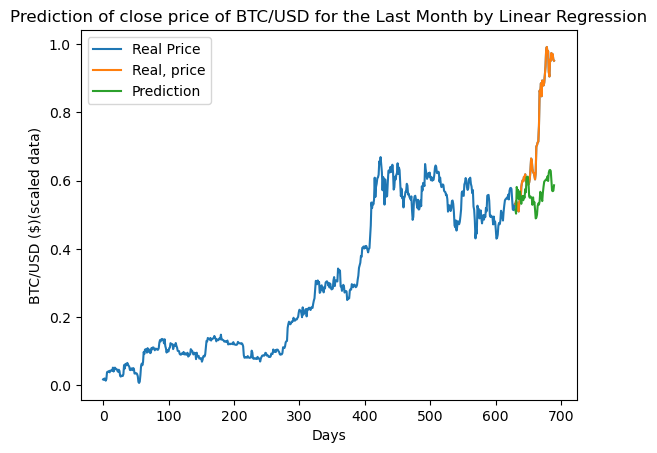

In [23]:
# Applying linear regression to the preprocessed data.
regression_matrix, future_price, simple_r2 = apply_linear_regression(scaled_data, prediction_time, price, target, regressor)
# Visualizing the model's performance.
visualize_model(regression_matrix, scaled_data)

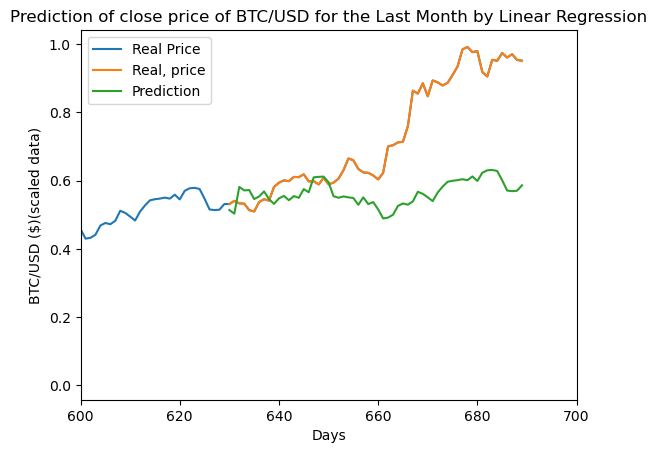

In [24]:
visualize_model(regression_matrix, scaled_data, zoom = [600, 700])

In [25]:
# Displaying the R-squared value of the linear regression model.
simple_r2

0.7202969005522191

In [26]:
def visualize_future(scaled_data, future, zoom = None):

    plt.xlabel('Days')
    plt.ylabel('BTC/USD ($)(scaled data)')
    arr1 = np.array(scaled_data['close']).reshape(-1, 1)
    arr2 = np.array(future).reshape(-1, 1) 
    ct = np.concatenate((arr1, arr2))
    plt.axvline(x = arr1.shape[0], color = 'r', linestyle = '--', label = 'Prediction')
    plt.plot(ct)
    if zoom is not None : 
        plt.xlim(zoom[0], zoom[1])
    plt.title('Prediction of close price of BTC/USD')

    plt.show

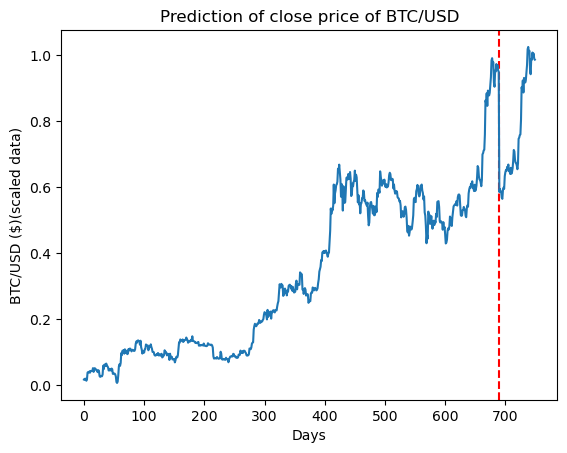

In [27]:
# Visualizing future price predictions made by the model.
visualize_future(scaled_data, future_price)

<function matplotlib.pyplot.show(close=None, block=None)>

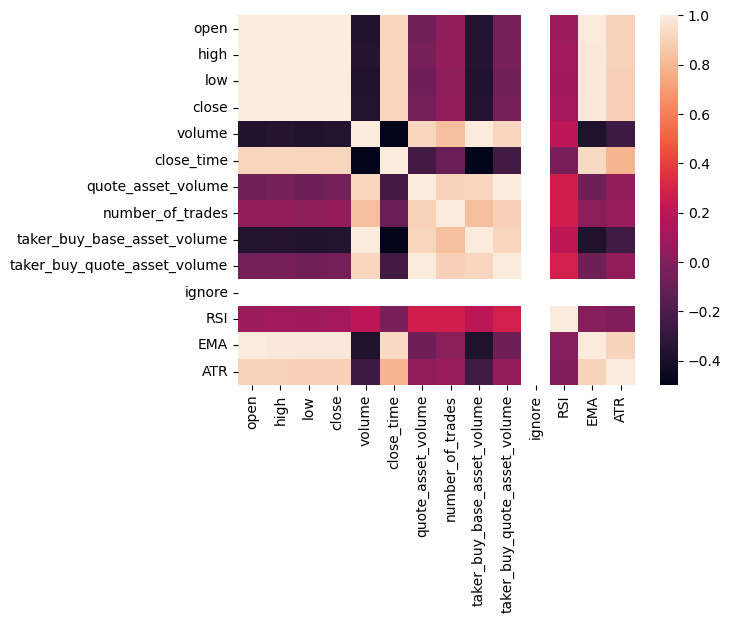

In [28]:
# Creating a correlation matrix from the final_data.
corr_matrix = final_data.drop('timestamp', axis=1).corr()
# A heatmap is then plotted using seaborn to visually represent the correlations.
sns.heatmap(corr_matrix)
plt.show

In [29]:
# Extracting the correlation values of all features with respect to the 'close' column from the correlation matrix.
corr_matrix['close']

open                            0.997587
high                            0.999219
low                             0.998765
close                           1.000000
volume                         -0.362149
close_time                      0.915089
quote_asset_volume             -0.054837
number_of_trades                0.046335
taker_buy_base_asset_volume    -0.358607
taker_buy_quote_asset_volume   -0.052573
ignore                               NaN
RSI                             0.106960
EMA                             0.992885
ATR                             0.899294
Name: close, dtype: float64

In [30]:
# Updating the list of regressors to include 'close', 'ATR', and 'EMA' for the data preprocessing step.
regressor = ['close', 'ATR', 'EMA']
price, target  = data_preprocess(scaled_data, regressor, prediction_time) # Data Processing for the model

In [31]:
# Applying linear regression with the updated set of regressors.
regression_matrix, future_price, mult_r2 = apply_linear_regression(scaled_data, prediction_time, price, target, regressor)

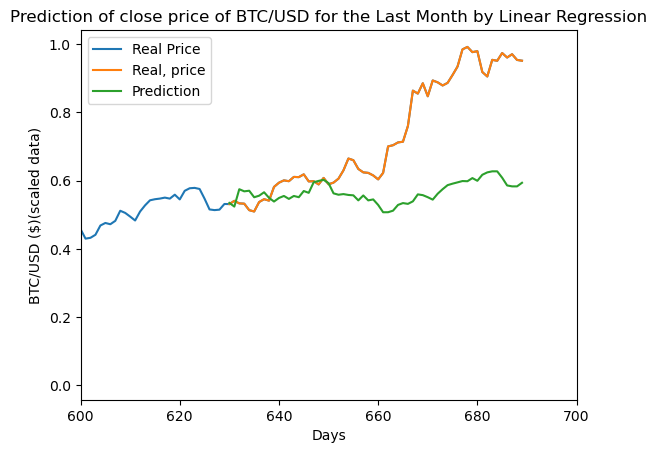

In [32]:
# Visualizing the performance of the linear regression model.
visualize_model(regression_matrix, scaled_data, zoom=[600,700])

In [33]:
# Displaying the R-squared values for both the multivariate model ('mult_r2') and the previous simple model ('simple_r2').
mult_r2, simple_r2

(0.7650833911016666, 0.7202969005522191)

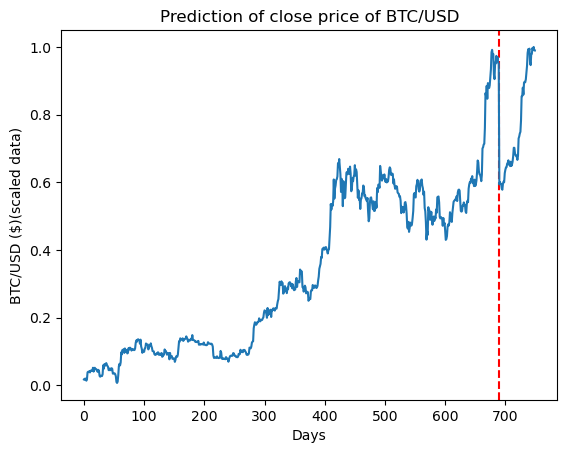

In [34]:
visualize_future(scaled_data, future_price)

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
# Creating a parameter grid for hyperparameter tuning. This grid includes a range of values for 'C' and 'gamma', which are parameters used in models like SVMs.
param_grid = {'C': [10**i for i in range(2, 11)], 
              'gamma' : [10**(-i) for i in range(2, 11)]} # Creat a dictionnary of parameters

In [37]:
def apply_svr(scaled_data, prediction_time, price, target, regressor, best_C, best_gamma):

    """

    Input : 
    scaled_data : type pandas DataFrame wich contains the scaled data 
    prediction_time : type int, if prediction_time = 5 we predict the 5th next value 
    price : type numpy array
    target : numpy array 
    regressor : type list of strings 
    best_C and best_gamma : type float wich are parameters of the SVR model 

    output : 
    prediction_matrix : type pandas DataFrame wich containts the realised price ans the predictions 
    future : type numpy array which contains the prediction_time future parice form the last date of the data set 
    svr_accuracy : type float it measures the accuracy or how well the model fit the data
    
    """


   

    price_train, price_test, target_train, target_test = train_test_split(price, target, test_size = 0.3)
    svr_rbf = SVR(kernel = 'rbf', C = best_C, gamma= best_gamma)
    svr_rbf.fit(price_train, np.ravel(target_train))

    price_to_predict = price[-prediction_time:] 
    svr_prediction = svr_rbf.predict(price_to_predict)


    prediction_matrix = pd.DataFrame(scaled_data['close'].tail(prediction_time))
    prediction_matrix['prediction'] = svr_prediction

    price_to_future = np.array(scaled_data[regressor])[-prediction_time:]
    future = svr_rbf.predict(price_to_future)

    svr_accuracy = svr_rbf.score(price_test, target_test)

    return prediction_matrix, future, svr_accuracy 

In [38]:
def cross_validation_parameter(param_grid, price_train, target_train):

    """
    
    Aim : Find the best parameters C and Gamma by Cross Validation 

    Input : 
    param_grid : type dictioary which contains the values of gamme and C we want to test 
    price_train and target_train : numpy array

    output : Gives the Best C and the Best Gamma among the value of param_grid
    
    """

    svr_rbf = SVR(kernel = 'rbf') # We use the Support Vector Regression
    search = GridSearchCV(svr_rbf, param_grid, cv=3, scoring = 'neg_mean_squared_error', n_jobs=-1)
    search.fit(price_train, np.ravel(target_train)) # we fit the cross validation on the data
    
    best_C = search.best_params_['C']
    best_gamma = search.best_params_['gamma']

    return best_C, best_gamma

In [39]:
# Splitting the price and target data into training and test sets, with 70% of data as training set.
price_train, _, target_train, _ = train_test_split(price, target, test_size = 0.3)
# The 'cross_validation_parameter' function is then used to find the best 'C' and 'gamma' values for a model, likely through a grid search approach.
best_C, best_gamma = cross_validation_parameter(param_grid, price_train, target_train)

In [40]:
print(f'The best values are {best_C} for C and {best_gamma} for Gamma')

The best values are 100000 for C and 0.01 for Gamma


In [41]:
# Applying a Support Vector Regression (SVR) model with the best 'C' and 'gamma' values found. 
svr_matrix, future_price, accuracy_score = apply_svr(scaled_data, prediction_time, price, target, regressor, best_C, best_gamma)

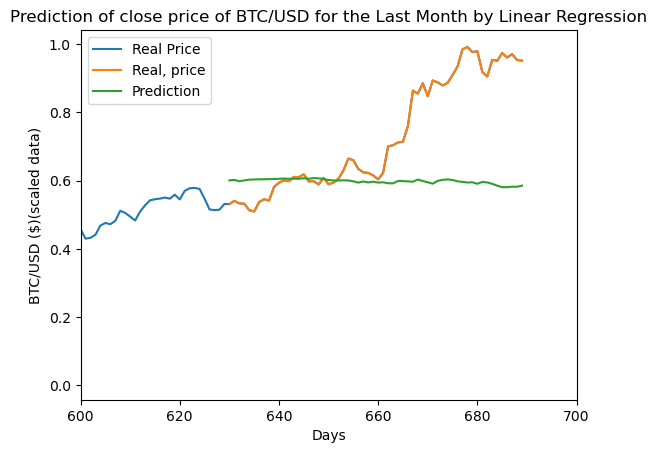

In [42]:
# Visualizing the SVR model's performance.
visualize_model(svr_matrix, scaled_data, zoom = [600, 700])

In [43]:
# Displaying the accuracy score of the SVR model.
accuracy_score

0.7766884214554677

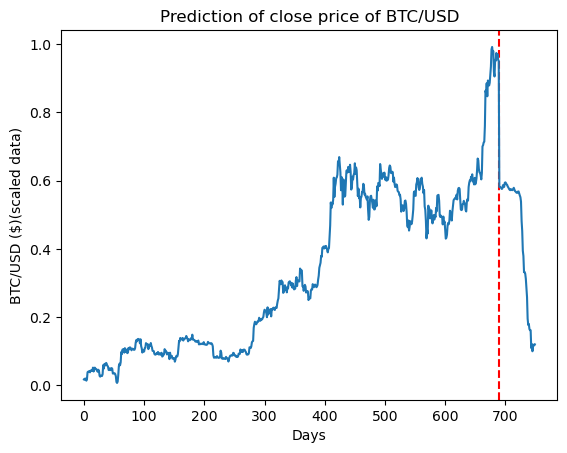

In [44]:
visualize_future(scaled_data, future_price)

In [45]:
# Function to create sequences for training the model
def create_sequences(scaled_data, sequence_length):

    """
    Aim : we want to change the format of the data to have an array of list of length sequence_length
    and another array of the shifted values which are the price we want to predict 

    Input : 
    scaled_data : type pandas DataFrame
    sequence_length : type int wich is the length of the slice

    Output : Two numpy arrays

    """

   
    xs, ys = [], []
    # Extract the column of data we want to predict (The close price)
    data=scaled_data.iloc[:, 4]
    # Iterate through the data to create sequences
    for i in range(len(data) - sequence_length):
        x = data[i:(i + sequence_length)] # Input sequence
        y = data[i + sequence_length] # Target value
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

In [46]:
def visualize_RNN_prediction(y_train, y_test,predicted_values):
    # Combining y_train and y_test
    full_y = np.concatenate([y_train, y_test])

    # Creating a time axis for the full dataset
    time_steps = np.arange(len(full_y))

    # Determine the starting point for y_test in the combined array
    test_start = len(y_train)

    # Plotting
    plt.figure(figsize=(12, 6))

    # Plot y_train part
    plt.plot(time_steps[:test_start], full_y[:test_start], label='Real price', color='blue')

    # Plot y_test part
    plt.plot(time_steps[test_start:], full_y[test_start:], label='Real price', color='orange')

    # Plot predicted_values on top of y_test
    plt.plot(time_steps[test_start:], predicted_values, label='Predicted Values', color='green', linestyle='--')

    plt.title('Full Data with Real price and Predicted price')
    plt.xlabel('time')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

In [47]:
def lstm_model(X, y):

    """

    Input : 
    X, y : type numpy array X is teh realised prices and y the prices we want to learn the model with 

    Output : 
    y_train, y_test : numpy array jsut in order to plot the them to compare properly 
    predicted_values : numpy array the prediction of the model on the test set

    
    """

  
    
    # We split the data into training and testing sets
    train_size = int(len(X) * 0.7)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)), # LSTM layer with 50 units and return sequences
    Dropout(0.2), # Dropout layer to prevent overfitting
    LSTM(50, return_sequences=False), 
    Dropout(0.2),
    Dense(25), 
    Dense(1) 
    ])

    model.compile(optimizer='adam', loss='mean_squared_error') # Use Adam optimizer and mean squared error loss to optimize the prediction
    model.fit(X_train, y_train, batch_size=351, epochs=100) # Train for 200 epochs (= How many times the entire dataset is used for training) with a batch size (=How many data samples are processed at a time during an epoch) of 351
    predicted_values= model.predict(X_test)

    return y_train, y_test, predicted_values


In [48]:
# Setting the sequence length for time series prediction.
sequence_length = 20 

In [49]:
# Creating sequences from the scaled data using the specified sequence length.
X, y = create_sequences(scaled_data, sequence_length) # Prediction based on 20 periods (20 days or 20 hours) 
# The 'lstm_model' function trains the LSTM on these sequences and makes predictions.
y_train, y_test, predicted_values = lstm_model(X, y)

Epoch 1/100


2024-12-03 18:19:13.827787: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/opt/conda/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.0714
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0337 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0090 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0097 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0163 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0087 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0045 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0052 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0064 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0063 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0044 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0030 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0027 
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0032 
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0030 
Epoch 16/100
2/2 

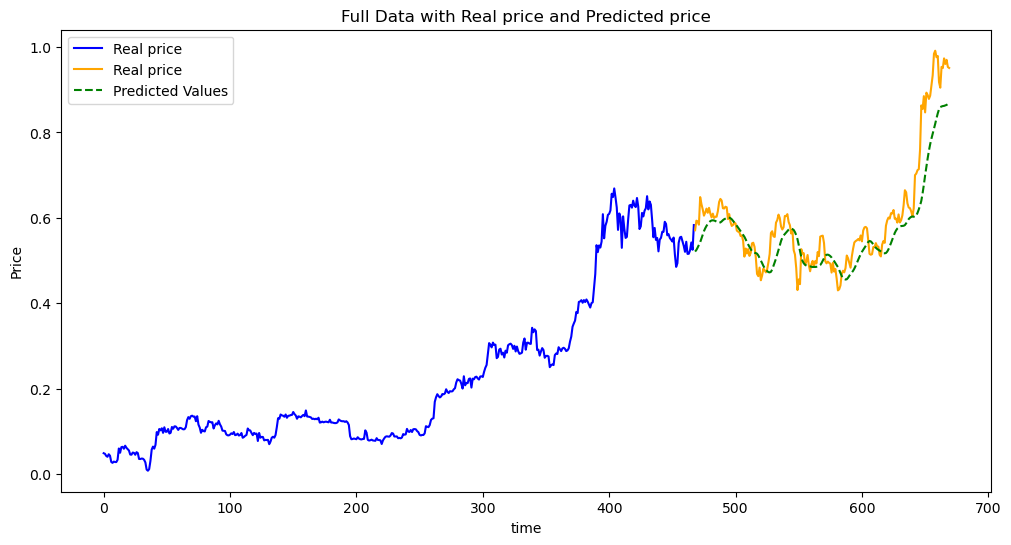

In [50]:
visualize_RNN_prediction(y_train, y_test, predicted_values)

In [51]:
data_file = "BTCUSDT_hourly_2023.csv"
hour_data = pd.read_csv(data_file)

# Convertir la colonne 'timestamp' en format datetime
hour_data['timestamp'] = pd.to_datetime(hour_data['timestamp']) 
hour_btc = scaling_data(hour_data)

Epoch 1/100


/opt/conda/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 0.0551
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - loss: 0.0061
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - loss: 0.0026
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - loss: 0.0017
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - loss: 0.0011
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - loss: 8.9284e-04
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - loss: 8.0922e-04
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - loss: 7.7323e-04
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - loss: 6.9304e-04
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - loss: 6.6800e-04
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - loss: 6.5657e-04
Epoch 12/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - loss: 6.0299e-04
Epoch 13/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - loss: 5.3317e-04
Epoch 14/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - loss: 5.3359e-04
Epoch 15/100
18/18 ━━━━━━━━━━━━━

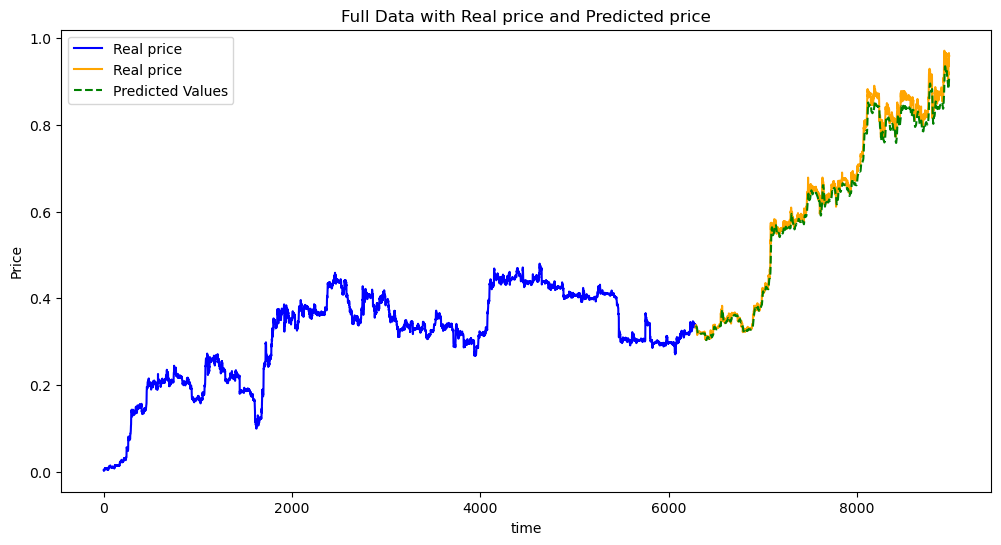

In [52]:
# Setting the sequence length for LSTM model, creating sequences from the hourly data, and applying the LSTM model to this data.
sequence_length = 20
X, y = create_sequences(hour_btc, sequence_length) # Prediction based on 20 hours 
y_train, y_test, predicted_values = lstm_model(X, y)
visualize_RNN_prediction(y_train, y_test, predicted_values)

In [53]:
def recursive_prediction(X,y, t):

 
    """

    Aim : Predict the future prices with LSTM model 
    we predict the next value and we give it to the model for forcasting the next value recursively

    Input : 
    X, y : type numpy array of the prices X the history and y the price we want to learn the model with 
    t : type int number of periods we want to predict 

    Output : type list wich contains the realised prices and the future prices at the end of the list

    """
    
    model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)), # LSTM layer with 50 units and return sequences
    Dropout(0.2), # Dropout layer to prevent overfitting
    LSTM(50, return_sequences=False), 
    Dropout(0.2),
    Dense(25), 
    Dense(1) 
    ])

    model.compile(optimizer='adam', loss='mean_squared_error') # Use Adam optimizer and mean squared error loss to optimize the prediction
    model.fit(X, y, batch_size=351, epochs=100) # Train for 200 epochs (= How many times the entire dataset is used for training) with a batch size (=How many data samples are processed at a time during an epoch) of 351
    
    prediction = y[-X.shape[1]:].tolist()

    while len(prediction) - X.shape[1] < t:
        l = np.array([prediction[-X.shape[1]:]])
        p = model.predict(l)
        prediction.append(p[0][0])
    return prediction

In [54]:
# Implementing a recursive prediction method.
t = 5
prediction = recursive_prediction(X, y, t)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0538
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0049
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0024
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0021
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0016
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0015
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0014
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0013
Epoch 9/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0011
Epoch 10/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0011
Epoch 11/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 9.8449e-04
Epoch 12/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 9.5710e-04
Epoch 13/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 9.6748e-04
Epoch 14/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 8.2728e-04
Epoch 15/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 2

In [55]:
def inverse_scalling(x, data):



    """

    Aim : Inverse scale the data to find the original format of the data after prediction

    Input : 
    x : type numpy array which contains the data to inverse scale 
    data : pandas DataFrame the original data with unscaled values 

    Output : numpy array with the unscaled values

    """

    
    y = pd.DataFrame(x)
    inv_scale  = lambda z : z * (data['high'].max() - data['low'].min()) + data['low'].min()
    x = np.array(y.apply(inv_scale))

    return x

In [56]:
prediction = inverse_scalling(prediction, hour_data)

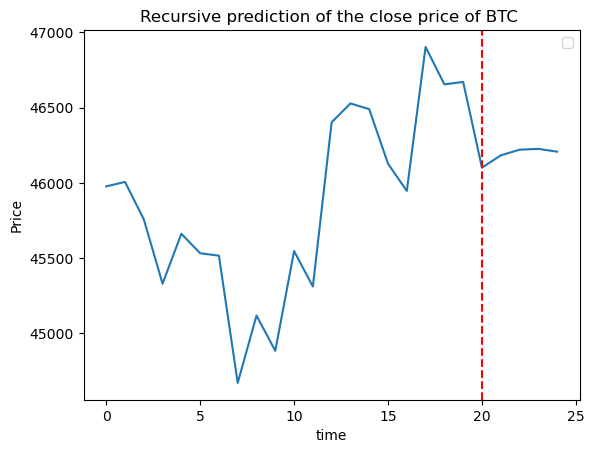

In [57]:
# Plotting the results of the recursive prediction.
# The red dashed line at 'sequence_length' indicates the point in the time series where the recursive prediction begins.
plt.plot(prediction)
plt.title('Recursive prediction of the close price of BTC ')
plt.axvline(x = sequence_length, color = 'r', linestyle = '--')
plt.xlabel('time')
plt.ylabel('Price')
plt.legend('')
plt.show()